# Pytorch中的两大法宝函数

In [40]:
import torch

torch.cuda.is_available()

True

## 1 `dir()`函数
> `dir()`函数用于查看一个对象(比如模块、类、变量等)所包含的属性和方法列表。它可以帮助我们了解某个对象具备哪些功能，常用于交互式编程和调试时快速浏览对象结构。

In [41]:
dir(torch)

['AVG',
 'AcceleratorError',
 'AggregationType',
 'AliasDb',
 'AnyType',
 'Argument',
 'ArgumentSpec',
 'AwaitType',
 'BFloat16Storage',
 'BFloat16Tensor',
 'BenchmarkConfig',
 'BenchmarkExecutionStats',
 'Block',
 'BoolStorage',
 'BoolTensor',
 'BoolType',
 'BufferDict',
 'ByteStorage',
 'ByteTensor',
 'CallStack',
 'Capsule',
 'CharStorage',
 'CharTensor',
 'ClassType',
 'Code',
 'CompilationUnit',
 'CompleteArgumentSpec',
 'ComplexDoubleStorage',
 'ComplexFloatStorage',
 'ComplexType',
 'ConcreteModuleType',
 'ConcreteModuleTypeBuilder',
 'DeepCopyMemoTable',
 'DeserializationStorageContext',
 'DeviceObjType',
 'DictType',
 'DisableTorchFunction',
 'DisableTorchFunctionSubclass',
 'DispatchKey',
 'DispatchKeySet',
 'DoubleStorage',
 'DoubleTensor',
 'EnumType',
 'ErrorReport',
 'Event',
 'ExcludeDispatchKeyGuard',
 'ExecutionPlan',
 'FatalError',
 'FileCheck',
 'FloatStorage',
 'FloatTensor',
 'FloatType',
 'FunctionSchema',
 'Future',
 'FutureType',
 'Generator',
 'GradScaler',
 'G

In [42]:
dir(torch.cuda)

['AcceleratorError',
 'Any',
 'BFloat16Storage',
 'BFloat16Tensor',
 'BoolStorage',
 'BoolTensor',
 'ByteStorage',
 'ByteTensor',
 'CUDAGraph',
 'CUDAPluggableAllocator',
 'Callable',
 'CharStorage',
 'CharTensor',
 'ComplexDoubleStorage',
 'ComplexFloatStorage',
 'CudaError',
 'DeferredCudaCallError',
 'DoubleStorage',
 'DoubleTensor',
 'Event',
 'ExternalStream',
 'FloatStorage',
 'FloatTensor',
 'GreenContext',
 'HalfStorage',
 'HalfTensor',
 'IntStorage',
 'IntTensor',
 'LongStorage',
 'LongTensor',
 'MemPool',
 'NewType',
 'Optional',
 'OutOfMemoryError',
 'ShortStorage',
 'ShortTensor',
 'Stream',
 'StreamContext',
 'TYPE_CHECKING',
 'Union',
 '_CudaBase',
 '_CudaDeviceProperties',
 '_DeviceGuard',
 '_HAS_PYNVML',
 '_LazySeedTracker',
 '_POOL_HANDLE',
 '_PYNVML_ERR',
 '_WrappedTritonKernel',
 '__all__',
 '__annotations__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_busy_wait_for_flag',
 '_cache

In [43]:
dir(torch.cuda.is_available)

['__annotations__',
 '__builtins__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

## 2 `help()`函数
> `help()`函数用于查看对象、模块、方法或类的说明文档。它能帮助我们快速了解某个对象的用途、参数和详细描述，在学习和调试代码时非常实用。例如：

In [44]:
help(torch.cuda.is_available)

Help on function is_available in module torch.cuda:

is_available() -> bool
    Return a bool indicating if CUDA is currently available.
    
    .. note:: This function will NOT poison fork if the environment variable
        ``PYTORCH_NVML_BASED_CUDA_CHECK=1`` is set. For more details, see
        :ref:`multiprocessing-poison-fork-note`.



# Pytorch加载数据

## 1 加载数据初认识

In [45]:
from torch.utils.data import Dataset
from PIL import Image
import matplotlib.pyplot as plt
import os

In [46]:
class MyData(Dataset):

    def __init__(self, root_dir, label_dir) -> None:
        super().__init__()
        self.root_dir = root_dir
        self.label_dir = label_dir
        self.path = os.path.join(self.root_dir, self.label_dir)
        self.img_path = os.listdir(self.path)

    def __getitem__(self, index):
        img_name = self.img_path[index]
        img_item_path = os.path.join(self.root_dir,self.label_dir, img_name)
        img = Image.open(img_item_path)
        label = self.label_dir
        return img, label

    def __len__(self):
        return len(self.img_path)

In [47]:
root_dir = './data/hymenoptera_data/val/'
ants_label_dir = 'ants'
bees_label_dir = 'bees'
ants_dataset = MyData(root_dir, ants_label_dir)
bees_dataset = MyData(root_dir, bees_label_dir)

train_dataset = ants_dataset + bees_dataset

In [48]:
print("ants数据集长度：{}，bees数据集长度：{}，总验证集长度：{}".format(len(ants_dataset), len(bees_dataset), len(train_dataset)))

ants数据集长度：70，bees数据集长度：83，总验证集长度：153


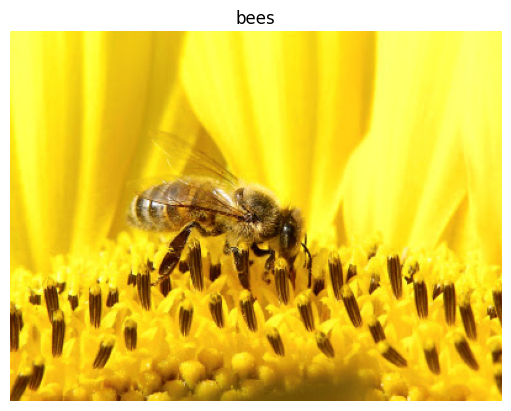

In [49]:
img, label = train_dataset[123]
plt.imshow(img)
plt.axis('off')
plt.title(label)
plt.show()

## 2 TensorBoard的使用
> TensorBoard是一个由TensorFlow开发的可视化工具，常用于对深度学习模型的训练过程进行监控和分析。通过TensorBoard，用户可以方便地可视化损失函数、准确率等指标的变化趋势，还可以展示模型的计算图结构、参数分布、图像样本等信息。在PyTorch中，可以通过SummaryWriter等工具，将训练过程中的关键数据记录到日志文件，再借助TensorBoard进行可视化展示，有助于模型的调试和性能分析。

In [50]:
from torch.utils.tensorboard import SummaryWriter
import numpy as np
from PIL import Image

2025-12-24 11:46:11.763659: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-24 11:46:11.995076: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI AVX_VNNI_INT8 AVX_NE_CONVERT FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-24 11:46:12.839235: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [51]:
img_path = "./data/hymenoptera_data/val/bees/10870992_eebeeb3a12.jpg"
img = Image.open(img_path)
print(type(img))
img_array = np.array(img)
print(type(img_array))
print(img_array.shape)

assert(type(img_array) == np.ndarray)

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'numpy.ndarray'>
(464, 500, 3)


In [52]:
writter = SummaryWriter("logs/test")

writter.add_image(tag="test", img_tensor=img_array, global_step=2, dataformats="HWC")
for i in range(100):
    writter.add_scalar(tag="y=x", scalar_value=i, global_step=i)

writter.close()

## 3 Transforms的使用

### 3.1 ToTensor的使用方法
`ToTensor`是PyTorch中用于将PIL图片或NumPy数组转换为张量（tensor）的工具，并且会自动将像素值归一化到[0,1]区间。
常用于数据预处理的第一步，将图片转成神经网络训练所需的张量格式。
**基本用法：**
1. 先实例化`transforms.ToTensor()`，得到一个转换器对象。
2. 使用该对象调用图片，得到tensor类型的数据。
3. 转换后的shape为(C, H, W)，像素值为float且在0-1之间。

示例代码如下：

```python
from torchvision import transforms
from PIL import Image

img = Image.open('sample.jpg')
to_tensor = transforms.ToTensor()
img_tensor = to_tensor(img)
print(img_tensor.shape)      # 输出: torch.Size([3, H, W])
print(img_tensor.max())      # 输出最大值: 1.0
print(img_tensor.min())      # 输出最小值: 0.0
```

In [53]:
from torch.utils.tensorboard import SummaryWriter
from torchvision import transforms
from PIL import Image
import cv2

In [54]:
writter = SummaryWriter("logs/test")

In [55]:
image_path = "./data/hymenoptera_data/val/bees/10870992_eebeeb3a12.jpg"
img = Image.open(img_path)
print(img)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x464 at 0x7B8786C80520>


In [56]:
tensor_trans = transforms.ToTensor()
tensor_img = tensor_trans(pic=img)
print(tensor_img)
print(type(tensor_img))
print(tensor_img.shape)

writter.add_image(tag="tensor_img", img_tensor=tensor_img, global_step=0, dataformats='CHW')

writter.close()

tensor([[[0.5725, 0.5725, 0.5725,  ..., 0.5686, 0.5725, 0.5765],
         [0.5725, 0.5725, 0.5725,  ..., 0.5686, 0.5725, 0.5765],
         [0.5686, 0.5686, 0.5725,  ..., 0.5686, 0.5725, 0.5765],
         ...,
         [0.5490, 0.5647, 0.5725,  ..., 0.6314, 0.6235, 0.6118],
         [0.5608, 0.5765, 0.5843,  ..., 0.5961, 0.5843, 0.5765],
         [0.5725, 0.5843, 0.5922,  ..., 0.5647, 0.5529, 0.5490]],

        [[0.4471, 0.4471, 0.4471,  ..., 0.4235, 0.4275, 0.4314],
         [0.4471, 0.4471, 0.4471,  ..., 0.4235, 0.4275, 0.4314],
         [0.4431, 0.4431, 0.4471,  ..., 0.4235, 0.4275, 0.4314],
         ...,
         [0.4000, 0.4157, 0.4235,  ..., 0.4706, 0.4627, 0.4510],
         [0.4118, 0.4275, 0.4353,  ..., 0.4431, 0.4314, 0.4235],
         [0.4235, 0.4353, 0.4431,  ..., 0.4118, 0.4000, 0.3961]],

        [[0.2471, 0.2471, 0.2471,  ..., 0.2588, 0.2627, 0.2667],
         [0.2471, 0.2471, 0.2471,  ..., 0.2588, 0.2627, 0.2667],
         [0.2431, 0.2431, 0.2471,  ..., 0.2588, 0.2627, 0.

In [57]:
img_cv2 = cv2.imread(img_path)
print(type(img_cv2))

<class 'numpy.ndarray'>


### 3.2 Normalize的使用方法

Normalize 是 torchvision.transforms 中的一个常用变换，用于对张量进行归一化操作。归一化通常可以加速模型的收敛速度，提高训练的稳定性。其基本原理是：对每个通道分别进行 `(x - mean) / std` 处理。

**使用方法示例：**

```python
from torchvision import transforms
from PIL import Image

# 先将图片转换为Tensor，再进行归一化
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # 对每个通道设置均值和标准差
])

img = Image.open("路径/图片.jpg")
img_normalized = transform(img)
print(img_normalized.shape)
print(img_normalized)
```

- `mean` 和 `std` 参数长度应等于图像通道数（如RGB为3）。
- 常用设置：mean=[0.485, 0.456, 0.406]，std=[0.229, 0.224, 0.225]（为ImageNet数据集统计所得）。
- 注意：Normalize 的输入必须是Tensor，通常需先用 ToTensor 转换。



In [58]:
from PIL import Image
from torch.utils.tensorboard import SummaryWriter
from torchvision import transforms

In [59]:
image_path = "./data/hymenoptera_data/val/ants/800px-Meat_eater_ant_qeen_excavating_hole.jpg"

writter = SummaryWriter("logs/test")

img = Image.open(img_path)
print(type(img))

# ToTensor
trans_totensor = transforms.ToTensor()
img_tensor = trans_totensor(img)
print(type(img_tensor))

writter.add_image(tag="ToTensor", img_tensor=img_tensor, global_step=0, dataformats='CHW')

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'torch.Tensor'>


In [60]:
# Normalize
print(img_tensor[0][0][0])
trans_norm = transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
img_norm = trans_norm(img_tensor)
print(img_norm[0][0][0])

writter.add_image(tag="Normalize", img_tensor=img_norm, global_step=0, dataformats='CHW')

tensor(0.5725)
tensor(0.1451)


In [61]:
# Resize
print(img.size)
print(img)
img_tensor = trans_totensor(img)
print(img_tensor)
writter.add_image(tag="Resize", img_tensor=img_tensor, global_step=0, dataformats='CHW')

trans_resize = transforms.Resize((128, 128))
img_resize = trans_resize(img)
print(img_resize)
img_resize = trans_totensor(img_resize)
print(img_resize)
writter.add_image(tag="Resize", img_tensor=img_resize, global_step=1, dataformats='CHW')

(500, 464)
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x464 at 0x7B8786C811E0>
tensor([[[0.5725, 0.5725, 0.5725,  ..., 0.5686, 0.5725, 0.5765],
         [0.5725, 0.5725, 0.5725,  ..., 0.5686, 0.5725, 0.5765],
         [0.5686, 0.5686, 0.5725,  ..., 0.5686, 0.5725, 0.5765],
         ...,
         [0.5490, 0.5647, 0.5725,  ..., 0.6314, 0.6235, 0.6118],
         [0.5608, 0.5765, 0.5843,  ..., 0.5961, 0.5843, 0.5765],
         [0.5725, 0.5843, 0.5922,  ..., 0.5647, 0.5529, 0.5490]],

        [[0.4471, 0.4471, 0.4471,  ..., 0.4235, 0.4275, 0.4314],
         [0.4471, 0.4471, 0.4471,  ..., 0.4235, 0.4275, 0.4314],
         [0.4431, 0.4431, 0.4471,  ..., 0.4235, 0.4275, 0.4314],
         ...,
         [0.4000, 0.4157, 0.4235,  ..., 0.4706, 0.4627, 0.4510],
         [0.4118, 0.4275, 0.4353,  ..., 0.4431, 0.4314, 0.4235],
         [0.4235, 0.4353, 0.4431,  ..., 0.4118, 0.4000, 0.3961]],

        [[0.2471, 0.2471, 0.2471,  ..., 0.2588, 0.2627, 0.2667],
         [0.2471, 0.2471, 0.24

In [62]:
writter.close()

### 3.3 Compose的使用方法

Compose是torchvision.transforms模块中的一个类，用于将多个图像变换操作组合在一起。通过Compose，可以将多个预处理操作按顺序组成一个变换流水线，简化数据处理流程。

使用方法示例：

```python
from torchvision import transforms
from PIL import Image

# 定义一个由多个步骤组成的变换流程
transform_pipeline = transforms.Compose([
    transforms.Resize((128, 128)),     # 缩放图片到128x128
    transforms.RandomHorizontalFlip(), # 随机水平翻转
    transforms.ToTensor()              # 转换为Tensor
])

img = Image.open("路径/图片.jpg")
img_transformed = transform_pipeline(img)
print(img_transformed.shape)
```

这样，输入的图片会依次经过Resize、RandomHorizontalFlip、ToTensor的处理，结果是一个可以用于深度学习的张量。



第一步：导入必要的包

In [63]:
from torchvision import transforms
from PIL import Image
import numpy as np
from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt

第二步：初始化TensorBoard的日志写入器

In [64]:
writter = SummaryWriter("logs/test")

第三步：定义图片地址

<class 'PIL.JpegImagePlugin.JpegImageFile'>
(1080, 1080)


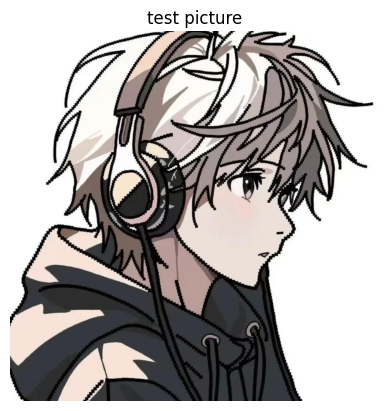

In [65]:
image_path = "./images/头像.jpg"
image = Image.open(image_path)
print(type(image))
print(image.size)
plt.imshow(image)
plt.title("test picture")
plt.axis("off")
plt.show()

第四步：定义各种transforms的基础变换，并组成Compose变换

In [66]:
trans_totensor = transforms.ToTensor()
trans_resize = transforms.Resize((128, 128))
trans_norm = transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
trans_randomhorizontalflip = transforms.RandomHorizontalFlip(p=0.5)
trans_randomcrop = transforms.RandomCrop((64, 64))

trans_compose = transforms.Compose([
    trans_resize,
    trans_totensor,
    trans_norm,
    trans_randomhorizontalflip
])

trans_compose2 = transforms.Compose([
    trans_randomcrop,
    trans_totensor
])

第五步：测试`trans_compose`

In [67]:
image_totensor = trans_totensor(image)
writter.add_image(tag="Compose", img_tensor=image_totensor, global_step=0)

image_compose = trans_compose(image)
writter.add_image(tag="Compose", img_tensor=image_compose, global_step=1)

第六步：测试`trans_compose2`

In [68]:
for i in range(10):
    img_crop = trans_compose2(image)
    writter.add_image(tag="crop", img_tensor=img_crop, global_step=i)

In [69]:
writter.close()

# Pytorch中的数据集

## 1 加载常见的物体分类数据集

### torchvision.datasets.CIFAR10() 使用说明

`torchvision.datasets.CIFAR10` 是 torchvision 提供的一个用于图像分类的常用数据集接口，用于加载 CIFAR-10 数据集。CIFAR-10 数据集包含 10 个类别的彩色图片，每张图片的大小为 32x32 像素。

#### 常用参数说明：
- `root`: 字符串，数据集存储的根目录。如果数据集没下载，会自动下载到该目录下。
- `train`: 布尔值，True 加载训练集，False 加载测试集。
- `transform`: 对 PIL 图片的预处理操作，比如 `transforms.ToTensor()`、数据增强等。
- `target_transform`: 对标签的预处理操作。
- `download`: 布尔值，True 表示如果数据集不存在则自动下载。

#### 代码示例：
```python
from torchvision import datasets, transforms
# 定义数据预处理操作
transform = transforms.ToTensor()
# 加载训练集
train_dataset = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
# 加载测试集
test_dataset = datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)

# 使用 DataLoader 加载数据
from torch.utils.data import DataLoader
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
```

#### 常见用法解析
1. 利用 `transform` 实现对输入图片的归一化、随机裁剪、翻转等数据增强操作，以提升模型泛化能力；
2. 设置 `download=True`，如本地没有数据集会自动下载，无需手动到官网下载和解压；
3. 可通过索引方式访问每一张图片和对应标签，例如：`img, label = train_dataset[0]`。



第一步：导入包

In [70]:
import torchvision
from PIL import Image
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter

第二步：下载数据集

In [71]:
train_set = torchvision.datasets.CIFAR10(
    root="./data/CIFAR10", 
    train=True, 
    download=True
)
test_set = torchvision.datasets.CIFAR10(
    root="./data/CIFAR10",
    train=False,
    download=True
)

第三步：查看标签

In [72]:
print(test_set.classes)
print(test_set[0])

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(<PIL.Image.Image image mode=RGB size=32x32 at 0x7B8786C82500>, 3)


第四步：查看测试集第一个样例

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7B8786CDAF80>, 3)
cat


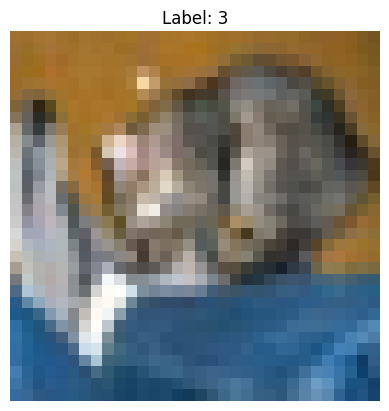

In [73]:
img, label = test_set[0]
print((img, label))
print(test_set.classes[3])
plt.imshow(img)
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()

第五步：加入变换`compose`

In [74]:
dataset_transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()
])

train_set = torchvision.datasets.CIFAR10(
    root="./data/CIFAR10", 
    train=True, 
    transform=dataset_transform,
    download=True
)
test_set = torchvision.datasets.CIFAR10(
    root="./data/CIFAR10",
    train=False,
    transform=dataset_transform,
    download=True
)

In [75]:
img, label = test_set[0]
print((img, label))

(tensor([[[0.6196, 0.6235, 0.6471,  ..., 0.5373, 0.4941, 0.4549],
         [0.5961, 0.5922, 0.6235,  ..., 0.5333, 0.4902, 0.4667],
         [0.5922, 0.5922, 0.6196,  ..., 0.5451, 0.5098, 0.4706],
         ...,
         [0.2667, 0.1647, 0.1216,  ..., 0.1490, 0.0510, 0.1569],
         [0.2392, 0.1922, 0.1373,  ..., 0.1020, 0.1137, 0.0784],
         [0.2118, 0.2196, 0.1765,  ..., 0.0941, 0.1333, 0.0824]],

        [[0.4392, 0.4353, 0.4549,  ..., 0.3725, 0.3569, 0.3333],
         [0.4392, 0.4314, 0.4471,  ..., 0.3725, 0.3569, 0.3451],
         [0.4314, 0.4275, 0.4353,  ..., 0.3843, 0.3725, 0.3490],
         ...,
         [0.4863, 0.3922, 0.3451,  ..., 0.3804, 0.2510, 0.3333],
         [0.4549, 0.4000, 0.3333,  ..., 0.3216, 0.3216, 0.2510],
         [0.4196, 0.4118, 0.3490,  ..., 0.3020, 0.3294, 0.2627]],

        [[0.1922, 0.1843, 0.2000,  ..., 0.1412, 0.1412, 0.1294],
         [0.2000, 0.1569, 0.1765,  ..., 0.1216, 0.1255, 0.1333],
         [0.1843, 0.1294, 0.1412,  ..., 0.1333, 0.1333, 0

In [76]:
writter = SummaryWriter('logs/p10')
for i in range(10):
    img, label = test_set[i]
    writter.add_image(tag='test_set', img_tensor=img, global_step=i)

writter.close()

## 2 `DataLoader`的使用

DataLoader是PyTorch中用于批量加载数据的工具。通过DataLoader，可以高效地迭代数据集、设置batch大小、是否打乱数据（shuffle）、多线程加速读取等。例如：

```python
from torch.utils.data import DataLoader

train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)
```

使用DataLoader之后，可以使用for循环批量读取数据：
```python
for images, labels in train_loader:
    # 这里可以进行训练过程，每次images的shape为[batch_size, C, H, W]
```
DataLoader大大简化了数据读取和预处理流程，是训练深度学习模型时不可或缺的工具。



第一步：导入必要包

In [77]:
import torchvision
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

第二步：加载数据

In [78]:
test_data = torchvision.datasets.CIFAR10(
    root="./data/CIFAR10/",
    train=False,
    transform=torchvision.transforms.ToTensor(),
    download=False
)

test_loader = DataLoader(
    dataset=test_data, 
    batch_size=4, 
    shuffle=True, 
    num_workers=0, 
    drop_last=True
)

In [79]:
img, target = test_data[0]
print(img.shape)
print(target)

torch.Size([3, 32, 32])
3


第三步：测试`test_loader`对应数据结构

In [80]:
writer = SummaryWriter('logs/dataloader')

for epoch in range(2):
    step = 0
    for data in test_loader:
        imgs, targets = data
        print(imgs.shape)
        print(targets)
        writer.add_images(tag="Epoch: {}".format(epoch), img_tensor=imgs, global_step=step)
        step += 1

writer.close()

torch.Size([4, 3, 32, 32])
tensor([2, 0, 9, 8])
torch.Size([4, 3, 32, 32])
tensor([3, 7, 0, 7])
torch.Size([4, 3, 32, 32])
tensor([2, 2, 1, 6])
torch.Size([4, 3, 32, 32])
tensor([3, 8, 7, 5])
torch.Size([4, 3, 32, 32])
tensor([7, 5, 6, 7])
torch.Size([4, 3, 32, 32])
tensor([5, 9, 5, 8])
torch.Size([4, 3, 32, 32])
tensor([3, 4, 4, 3])
torch.Size([4, 3, 32, 32])
tensor([4, 6, 2, 1])
torch.Size([4, 3, 32, 32])
tensor([2, 8, 6, 3])
torch.Size([4, 3, 32, 32])
tensor([1, 5, 0, 3])
torch.Size([4, 3, 32, 32])
tensor([2, 2, 3, 7])
torch.Size([4, 3, 32, 32])
tensor([9, 2, 9, 4])
torch.Size([4, 3, 32, 32])
tensor([9, 8, 9, 1])
torch.Size([4, 3, 32, 32])
tensor([9, 3, 5, 5])
torch.Size([4, 3, 32, 32])
tensor([9, 7, 3, 1])
torch.Size([4, 3, 32, 32])
tensor([4, 5, 2, 5])
torch.Size([4, 3, 32, 32])
tensor([6, 2, 0, 5])
torch.Size([4, 3, 32, 32])
tensor([6, 6, 8, 3])
torch.Size([4, 3, 32, 32])
tensor([0, 4, 1, 7])
torch.Size([4, 3, 32, 32])
tensor([2, 2, 7, 3])
torch.Size([4, 3, 32, 32])
tensor([3, 0,

# 神经网络的基本骨架

## 1 `nn.Module`的使用

### 1.1 创建第一个神经网络架构

第一步：导入必要的包

In [81]:
import torch.nn as nn
import torch.nn.functional as F
import torch

第二步：定义模型的类

In [82]:
class Penry(nn.Module):
    def __init__(self) -> None:
        super().__init__()

    def forward(self, input):
        output = input + 1
        return output

第三步：测试

In [83]:
penry = Penry()

x = torch.tensor(1.0)
output = penry(x)
print(output)

tensor(2.)


### 1.2 卷积操作

`torch.nn.functional.Conv2d` 是 PyTorch 中用于实现二维卷积操作的函数式接口。
通常情况下，我们更常用的是 `nn.Conv2d` 模块来构建卷积层，因为它会自动帮我们管理权重和偏置参数。
但有时我们需要直接使用 `torch.nn.functional.Conv2d`，比如自定义网络结构或在某些 forward 中手动控制卷积。

基本使用方法如下：
```python
import torch
import torch.nn.functional as F

# 假设有一个输入张量，形状为[N, C_in, H, W]
x = torch.randn(1, 3, 32, 32)  # 1个batch，3通道，32x32大小

# 定义卷积核权重和偏置。手动指定权重时，注意格式：[out_channels, in_channels, kernel_size, kernel_size]
weight = torch.randn(6, 3, 5, 5)  # 6个输出通道，3个输入通道，核大小5x5
bias = torch.randn(6)  # 每个输出通道一个bias

# 使用 F.conv2d 进行卷积
output = F.conv2d(x, weight, bias, stride=1, padding=0)

print(output.shape)  # 输出张量大小将取决于输入、kernel、stride、padding等参数
```

In [84]:
import torch
import torch.nn.functional as F

In [85]:
input = torch.tensor([
    [1, 2, 0, 3, 1],
    [0, 1, 2, 3, 1],
    [1, 2, 1, 0, 0],
    [5, 2, 3, 1, 1],
    [2, 1, 0, 1, 1]
])

output = torch.tensor([
    [1, 2, 1],
    [0, 1, 0],
    [2, 1, 0]
])

In [86]:
print(input.shape)
print(output.shape)

torch.Size([5, 5])
torch.Size([3, 3])


In [87]:
input = torch.reshape(input=input, shape=(1, 1, 5, 5))
kernel = torch.reshape(input=output, shape=(1, 1, 3, 3))

print(input.shape)
print(kernel.shape)

torch.Size([1, 1, 5, 5])
torch.Size([1, 1, 3, 3])


In [88]:
output = F.conv2d(input=input, weight=kernel, stride=1)
print(output)

tensor([[[[10, 12, 12],
          [18, 16, 16],
          [13,  9,  3]]]])


In [89]:
output2 = F.conv2d(input=input, weight=kernel, stride=2)
print(output2)

tensor([[[[10, 12],
          [13,  3]]]])


In [90]:
output3 = F.conv2d(input=input, weight=kernel, stride=1, padding=1)
print(output3)

tensor([[[[ 1,  3,  4, 10,  8],
          [ 5, 10, 12, 12,  6],
          [ 7, 18, 16, 16,  8],
          [11, 13,  9,  3,  4],
          [14, 13,  9,  7,  4]]]])


## 2 卷积层
> 卷积层（Convolutional Layer）是神经网络中常用的一种层，特别是在处理图像等数据时非常有效。卷积层通过卷积操作（如滑动一个小的卷积核对输入进行加权求和），能够有效提取空间局部特征，在图像识别、目标检测等任务中有着广泛应用。

### 2.1 `torch.nn.Conv2d` 详解

`torch.nn.Conv2d` 是 PyTorch 中实现二维卷积操作的核心类，广泛应用于处理图像等二维数据。它通常用于卷积神经网络（CNN）的卷积层中，能够自动完成参数（卷积核）学习与前向传播。

#### 构造函数参数

```python
torch.nn.Conv2d(
    in_channels,     # 输入通道数，例如RGB图像为3
    out_channels,    # 输出通道数，即卷积核/滤波器的个数
    kernel_size,     # 卷积核大小，可以是int或tuple
    stride=1,        # 步长，默认1
    padding=0,       # 填充，默认0
    dilation=1,      # 膨胀系数，默认1
    groups=1,        # 分组卷积，默认1
    bias=True,       # 是否添加偏置，默认True
    padding_mode='zeros' # 填充模式，常用'zeros'
)
```

常见参数解释：
- **in_channels**：输入特征图的通道数，例如灰度图为1，彩色图为3。
- **out_channels**：卷积后输出特征图的通道数，也就是卷积核的数量。
- **kernel_size**：卷积窗口的空间尺寸，比如3或(3, 3)。
- **stride**：卷积核移动的步长，控制下采样速率。
- **padding**：左右/上下加多少圈0，影响输出尺寸。
- **groups**：分组卷积用，典型用法 depthwise 卷积。

#### 输入输出张量形状

- 输入: 形状为 `(batch_size, in_channels, H, W)`
- 输出: 形状为 `(batch_size, out_channels, H_out, W_out)`

其中输出空间尺寸根据以下公式计算（默认 stride=1, padding=0, dilation=1）:

```
H_out = floor((H + 2*padding - dilation*(kernel_size-1) - 1)/stride + 1)
W_out = floor((W + 2*padding - dilation*(kernel_size-1) - 1)/stride + 1)
```

#### 常用用法实例

```python
import torch
import torch.nn as nn

# 定义一个输入为1通道，输出为6通道，卷积核3x3的卷积层
conv = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, stride=1, padding=1)

# 随机生成一个输入(batch_size=4, 通道数=1, 高度=28, 宽度=28)
x = torch.randn(4, 1, 28, 28)

# 前向传播
output = conv(x)
print(output.shape)  # torch.Size([4, 6, 28, 28])
```

#### tips
- 卷积层中的 `weight` 和 `bias` 参数都可以反向传播自动学习。
- 常和激活、池化、归一化等层级联使用，形成强大特征提取能力。
- 利用 `conv.weight` 可直接访问或初始化卷积核权重。

详细文档可参考: https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

第一步：导入必要包

In [91]:
import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

第二步：导入数据

In [92]:
dataset = torchvision.datasets.CIFAR10(
    root="./data/CIFAR10/",
    train= False,
    transform=torchvision.transforms.ToTensor(),
    download=True   
)

dataloader = DataLoader(dataset=dataset, batch_size=64, shuffle=False)

第三步：定义网络结构

In [93]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=3, stride=1, padding=0)

    def forward(self, x):
        x = self.conv1(x)
        return x

第四步：测试

In [94]:
model = Model()

print(model)

Model(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
)


In [95]:
writer = SummaryWriter(log_dir="./logs/dataloader1")

step = 1
for data in dataloader:
    imgs, labels = data
    output = model(imgs)
    # print(imgs.shape)
    # torch.Size([64, 3, 32, 32])
    # print(output.shape)
    # torch.Size([64, 6, 30, 30])
    writer.add_images(tag='input', img_tensor=imgs, global_step=step)

    output = torch.reshape(input = output, shape=(-1, 3, 30, 30))
    writer.add_images(tag='output', img_tensor=output, global_step=step)
    step += 1

## 3 最大池化的使用

> 在神经网络中，最大池化（Max Pooling）是一种常用的下采样操作，主要用于减小特征图的尺寸、降低参数量及计算量，同时帮助模型提取主要特征并增强模型的泛化能力。本节将介绍如何在PyTorch中实现最大池化操作。

### 3.1 `torch.nn.MaxPool2d` 详解

`torch.nn.MaxPool2d` 是用于对二维输入（例如图片）进行最大池化操作的 PyTorch 层。最大池化会在特征图的某个区域内取最大值，从而达到降采样、减小参数维度的效果。常用参数包括：
- `kernel_size`: 池化窗口的大小（int 或 tuple），比如 2 表示 2x2 的池化窗口；
- `stride`: 步长，窗口移动的步幅，默认等于 kernel_size；
- `padding`: 填充，控制输入边界的处理方式，默认为 0；
- `return_indices`: 如果为 True，会返回最大值的位置，常用于反池化操作；
- `ceil_mode`: 如果为 True，则采用向上取整来计算输出形状，即保留。

典型用法示例：
```python
import torch
import torch.nn as nn
pool = nn.MaxPool2d(kernel_size=2, stride=2)
x = torch.randn(1, 1, 4, 4)
output = pool(x)
print(output.shape)  # torch.Size([1, 1, 2, 2])
```

这样可以有效地降低特征图尺寸，实现特征提取和降噪的作用。

第一步：导入必要包

In [96]:
import torch
import torch.nn as nn
from torch.nn import MaxPool2d
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

第二步：输入数据

In [97]:
input = torch.tensor([
    [1, 2, 0, 3, 1],
    [0, 1, 2, 3, 1],
    [1, 2, 1, 0 ,0],
    [5, 2, 3, 1, 1],
    [2, 1, 0, 1, 1]
])

input = torch.reshape(input=input, shape=(-1, 1, 5, 5))
print(input.shape)

torch.Size([1, 1, 5, 5])


第三步：搭建网络结构

In [98]:
class Mymodel1(nn.Module):
    def __init__(self):
        super(Mymodel1, self).__init__()
        self.maxpool1 = MaxPool2d(kernel_size=3 ,ceil_mode=True)

    def forward(self, input):
        output = self.maxpool1(input)
        return output

第四步：测试

In [99]:
model = Mymodel1()
print(model)

Mymodel1(
  (maxpool1): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=True)
)


In [100]:
output = model(input)
print(output)

tensor([[[[2, 3],
          [5, 1]]]])


第五步：导入数据测试

In [101]:
dataset = torchvision.datasets.CIFAR10(
    root="./data/CIFAR10/", 
    train=False, 
    transform=torchvision.transforms.ToTensor(),
    download=True
)

dataloader = DataLoader(dataset=dataset, batch_size=64, drop_last=True)

In [102]:
writer = SummaryWriter(log_dir="./logs/maxpool/")

step = 0
for data in dataloader:
    imgs, labels = data
    writer.add_images(tag="input", img_tensor=imgs, global_step=step)
    output = model(imgs)
    writer.add_images(tag="output", img_tensor=output, global_step=step)
    step +=1

writer.close()

## 4 非线性激活
 
在深度学习中，非线性激活函数（Activation Function）是引入神经网络非线性能力的关键。没有激活函数，无论你堆叠多少层卷积（或全连接）层，本质上网络都只能表示线性变换，无法拟合复杂的数据分布和决策边界。因此，非线性激活是神经网络中不可或缺的一步。
 
在卷积神经网络（CNN）中，常见的非线性激活函数有：
- ReLU (Rectified Linear Unit): `f(x) = max(0, x)`，现在用得最广泛，收敛快，效果普遍较好。
- Leaky ReLU, PReLU 等其他变种，可以缓解“神经元死亡”问题。
- Sigmoid 和 Tanh 这种早期的激活函数，常用于输出层或特殊场景，但现在在深层网络中用得较少。
 
激活函数通常插在每个卷积层或全连接层之后。以 ReLU 为例，pytorch 实现如下：
```python
import torch.nn as nn
relu = nn.ReLU()
out = relu(x)
```
或者直接在模型的 `forward` 中使用 `F.relu(x)`。
 
总之，非线性激活提升了神经网络的表达能力，使其可以学习到更复杂的图像特征。对于 CNN 而言，激活函数的选择和合理使用对训练效果有很大影响。

简单测试：

In [103]:
import torch
import torch.nn as nn

In [104]:
input = torch.tensor([
    [1, -0.5],
    [-1, 3]
])

input = torch.reshape(input, (-1, 1, 2, 2))
print(input.shape)

torch.Size([1, 1, 2, 2])


In [105]:
class Mymodel2(nn.Module):
    def __init__(self):
        super().__init__()
        self.relu1 = nn.ReLU(inplace=False) # 不会更换掉原本的input内容

    def forward(self, input):
        output = self.relu1(input)
        return output

In [106]:
model = Mymodel2()
output = model(input)
print(output)

tensor([[[[1., 0.],
          [0., 3.]]]])


图片测试

In [107]:
from turtle import forward
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

dataset = torchvision.datasets.CIFAR10(
    root='./data/CIFAR10/', 
    train = False,
    transform=torchvision.transforms.ToTensor(),
    download=True
)

dataloader = DataLoader(dataset=dataset, batch_size=64, drop_last=True)

class Mymodel3(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, input):
        output = self.sigmoid(input)
        return output

model = Mymodel3()
print(model)

writer = SummaryWriter(log_dir='./logs/activation/')

step = 0
for data in dataloader:
    imgs, labels = data
    writer.add_images(tag='input', img_tensor=imgs, global_step=step)

    output_imgs = model(imgs)
    writer.add_images(tag='output', img_tensor=output_imgs, global_step=step)

    step +=1

writer.close()

Mymodel3(
  (sigmoid): Sigmoid()
)


## 5 线性层及其它层介绍

在线性神经网络中，线性层（nn.Linear）是最基础也是最常用的层之一。它的作用就是进行一次线性变换：y = Wx + b。

下面是一个简单的例子，介绍如何使用 nn.Linear 层：

```python
import torch
from torch import nn

# 假设我们有每个输入样本4个特征，输出需要2个特征
linear = nn.Linear(in_features=4, out_features=2)

# 创建一个 batch，大batch里有3个样本，每个样本4个特征
x = torch.rand((3, 4))
print("输入：", x)

output = linear(x)
print("输出：", output)
print("权重参数：", linear.weight)
print("偏置参数：", linear.bias)
```

除了线性层，常见的其它层包括：
- nn.Conv2d：卷积层，主要用于处理图像等空间相关特征；
- nn.ReLU：激活函数层，对线性输出增加非线性因素；
- nn.BatchNorm2d：批量归一化层，加速收敛、稳定网络训练；
- nn.MaxPool2d：最大池化层，常用于降低特征尺寸、提取主要特征；

你可以通过组合这些层来自由搭建复杂的神经网络结构。

第一步：导入必要的包

In [108]:
import torchvision
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

第二步：导入数据并查看数据格式

In [109]:
dataset = torchvision.datasets.CIFAR10(
    root='./data/CIFAR10/',
    train=False,
    transform = torchvision.transforms.ToTensor()
)

dataloader = DataLoader(dataset=dataset, batch_size=64, drop_last=True)

for data in dataloader:
    imgs, labels = data
    # print(imgs.shape)
    output = torch.reshape(input=imgs, shape=(1, 1, 1, -1))
    print(output.shape)

torch.Size([1, 1, 1, 196608])
torch.Size([1, 1, 1, 196608])
torch.Size([1, 1, 1, 196608])
torch.Size([1, 1, 1, 196608])
torch.Size([1, 1, 1, 196608])
torch.Size([1, 1, 1, 196608])
torch.Size([1, 1, 1, 196608])
torch.Size([1, 1, 1, 196608])
torch.Size([1, 1, 1, 196608])
torch.Size([1, 1, 1, 196608])
torch.Size([1, 1, 1, 196608])
torch.Size([1, 1, 1, 196608])
torch.Size([1, 1, 1, 196608])
torch.Size([1, 1, 1, 196608])
torch.Size([1, 1, 1, 196608])
torch.Size([1, 1, 1, 196608])
torch.Size([1, 1, 1, 196608])
torch.Size([1, 1, 1, 196608])
torch.Size([1, 1, 1, 196608])
torch.Size([1, 1, 1, 196608])
torch.Size([1, 1, 1, 196608])
torch.Size([1, 1, 1, 196608])
torch.Size([1, 1, 1, 196608])
torch.Size([1, 1, 1, 196608])
torch.Size([1, 1, 1, 196608])
torch.Size([1, 1, 1, 196608])
torch.Size([1, 1, 1, 196608])
torch.Size([1, 1, 1, 196608])
torch.Size([1, 1, 1, 196608])
torch.Size([1, 1, 1, 196608])
torch.Size([1, 1, 1, 196608])
torch.Size([1, 1, 1, 196608])
torch.Size([1, 1, 1, 196608])
torch.Size

第三步：定义网络结构

In [110]:
class Mymodel4(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(in_features=196608, out_features=10)

    def forward(self, input):
        output = self.linear1(input)
        return output

第四步：测试

In [111]:
model = Mymodel4()

for data in dataloader:
    imgs, labels = data
    print(imgs.shape)
    input = torch.reshape(input=imgs, shape=(1, 1, 1, -1))
    print(input.shape)
    output = model(input)
    print(output.shape)

torch.Size([64, 3, 32, 32])
torch.Size([1, 1, 1, 196608])
torch.Size([1, 1, 1, 10])
torch.Size([64, 3, 32, 32])
torch.Size([1, 1, 1, 196608])
torch.Size([1, 1, 1, 10])
torch.Size([64, 3, 32, 32])
torch.Size([1, 1, 1, 196608])
torch.Size([1, 1, 1, 10])
torch.Size([64, 3, 32, 32])
torch.Size([1, 1, 1, 196608])
torch.Size([1, 1, 1, 10])
torch.Size([64, 3, 32, 32])
torch.Size([1, 1, 1, 196608])
torch.Size([1, 1, 1, 10])
torch.Size([64, 3, 32, 32])
torch.Size([1, 1, 1, 196608])
torch.Size([1, 1, 1, 10])
torch.Size([64, 3, 32, 32])
torch.Size([1, 1, 1, 196608])
torch.Size([1, 1, 1, 10])
torch.Size([64, 3, 32, 32])
torch.Size([1, 1, 1, 196608])
torch.Size([1, 1, 1, 10])
torch.Size([64, 3, 32, 32])
torch.Size([1, 1, 1, 196608])
torch.Size([1, 1, 1, 10])
torch.Size([64, 3, 32, 32])
torch.Size([1, 1, 1, 196608])
torch.Size([1, 1, 1, 10])
torch.Size([64, 3, 32, 32])
torch.Size([1, 1, 1, 196608])
torch.Size([1, 1, 1, 10])
torch.Size([64, 3, 32, 32])
torch.Size([1, 1, 1, 196608])
torch.Size([1, 1, 

In [112]:
t = torch.tensor([
    [
        [1, 2],
        [3, 4]
    ],
    [
        [5, 6],
        [7, 8]
    ]
])

print(t.shape)

torch.Size([2, 2, 2])


In [113]:
flatten_t = torch.flatten(t)
print(flatten_t)
print(flatten_t.shape)

tensor([1, 2, 3, 4, 5, 6, 7, 8])
torch.Size([8])


## 6 搭建小实战和`Sequential`的使用

下面我们用 nn.Sequential 搭建一个简单的全连接神经网络，用于分类任务。

### nn.Sequential详解

`nn.Sequential` 是 PyTorch 提供的一个模块容器，可以把一系列的层（如线性层、激活函数、卷积层等）按照顺序组合在一起，构建为一个模型。它的核心特性就是**按照添加的顺序依次执行每一层**，通常适用于模型的前向传播是线性的、没有分支结构的简单场景。

常用的两种定义方式：
- 直接传入层的实例
- 通过有序字典（`OrderedDict`）传入带名字的层，便于后续查找

例如：
```python
# 方式一：直接传入层
model_seq1 = nn.Sequential(
    nn.Linear(196608, 512),
    nn.ReLU(),
    nn.Linear(512, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

# 方式二：通过有序字典
from collections import OrderedDict
model_seq2 = nn.Sequential(OrderedDict([
    ("fc1", nn.Linear(196608, 512)),
    ("relu1", nn.ReLU()),
    ("fc2", nn.Linear(512, 128)),
    ("relu2", nn.ReLU()),
    ("fc3", nn.Linear(128, 10))
]))
```

使用 `print(model_seq)` 可以很方便地查看模型结构，了解每一层的名称和参数信息：
```python
print(model_seq1)
print(model_seq2)
```

Sequential模型的输入数据需要与第一层的输入维度一致。例如这里假设我们处理的是一张 3*224*224 的图片，展平成 196608 维的一维向量输入：
```python
x = torch.randn(1, 196608)  # 随机生成一张展平后的图片
output = model_seq1(x)
print("output shape:", output.shape)  # 应该是 [1, 10]
```

注意事项：
- `nn.Sequential` 只能表示按顺序逐层传递的模型结构，如果网络中存在更复杂的结构（分支、跳连等），通常需要自定义 `nn.Module`。
- 每层的输出形状要和下一层的输入形状严格对应，否则会报错。
- 可以通过下标/层名访问或修改子层，比如 `model_seq1[0]`, `model_seq2.relu1`。

小结：`nn.Sequential` 提供了极其简洁的模型定义方式，非常适合用于快速实验和入门模型的搭建。

<p align="center">
  <img src="https://penry-1352739541.cos.ap-beijing.myqcloud.com/img/20251223150102973.png" alt="" width="80%" height="height">
</p>

第一步：导入必要的包

In [114]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

第二步：搭建网络结构

In [115]:
class Mymodel5(nn.Module):
    def __init__(self):
        super().__init__()
        # self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5, padding=2)
        # self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        # self.conv2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=5, padding=2)
        # self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        # self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding=2)
        # self.maxpool3 = nn.MaxPool2d(kernel_size=2)
        # self.flatten = nn.Flatten()
        # self.linear1 = nn.Linear(in_features=1024, out_features=64)
        # self.linear2 = nn.Linear(in_features=64, out_features=10)
        self.model1 = nn.Sequential(
            nn.Conv2d(3, 32, 5, padding=2),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 32, 5, padding=2),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 5, padding=2),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(1024, 64),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        # x = self.conv1(x)
        # x = self.maxpool1(x)
        # x = self.conv2(x)
        # x = self.maxpool2(x)
        # x = self.conv3(x)
        # x = self.maxpool3(x)
        # x = self.flatten(x)
        # x = self.linear1(x)
        # x = self.linear2(x)
        x = self.model1(x)
        return x

In [116]:
model = Mymodel5()
print(model)

Mymodel5(
  (model1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=1024, out_features=64, bias=True)
    (8): Linear(in_features=64, out_features=10, bias=True)
  )
)


第三步：测试

In [117]:
input = torch.ones((64, 3, 32, 32))
output = model(input)
print(output.shape)

writer = SummaryWriter("./logs/CIFAR10/")
writer.add_graph(model, input)
writer.close()

torch.Size([64, 10])


## 7 损失函数与反向传播

```python
# 1. 设置损失函数
loss_fn = nn.CrossEntropyLoss()

# 2. 设置优化器
learning_rate = 1e-2
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3. 伪造一个标签  (64张图，每张有一个[0-9]的类别)
target = torch.randint(0, 10, (64,))

# 4. 前向传播
output = model(input)
loss = loss_fn(output, target)
print("loss:", loss.item())

# 5. 反向传播
optimizer.zero_grad()  # 梯度清零
loss.backward()        # 反向传播，计算梯度
optimizer.step()       # 更新参数
```

### 7.1 常见的损失函数
 
**损失函数** `Loss Function` 用于衡量模型预测值与真实值之间的差异，是神经网络训练过程中的重要组成部分。常见的损失函数有：
 
- **L1损失函数（Mean Absolute Error, MAE）**
    - 计算预测值与真实值误差的绝对值之和或平均值，公式：$\mathrm{L1} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$
    - 对离群值不敏感，适合异常值较多的场景。

- **L2损失函数（Mean Squared Error, MSE）**
    - 计算预测值与真实值误差的平方和或均值，公式：$\mathrm{L2} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$
    - 更加关注较大误差，对异常值比较敏感，常用于回归问题。

- **交叉熵损失函数（Cross Entropy Loss）**
    - 主要用于分类问题，衡量预测分布与真实分布之间的距离。对多类别分类，常用`nn.CrossEntropyLoss()`。
    - 公式：$-\sum_{i} y_i \log(\hat{y}_i)$，其中$y_i$为真实类别的one-hot表示，$\hat{y}_i$为预测概率。

在PyTorch中，这些损失函数可通过`torch.nn`模块直接调用：
- `nn.L1Loss()`：L1损失
- `nn.MSELoss()`：L2损失
- `nn.CrossEntropyLoss()`：交叉熵损失

In [118]:
import torch
import torch.nn as nn

In [119]:
input = torch.tensor([1, 2, 3], dtype=torch.float32)
targets = torch.tensor([1, 2, 5], dtype=torch.float32)

input = torch.reshape(input, (1, 1, 1, 3))
targets = torch.reshape(targets, (1, 1, 1, 3))

loss1 = nn.L1Loss(reduction='sum')
loss2 = nn.L1Loss(reduction='mean')

result1 = loss1(input, targets)
result2 = loss2(input, targets)

print(result1)
print(result2)

tensor(2.)
tensor(0.6667)


In [120]:
loss_mse = nn.MSELoss()
result_mse = loss_mse(input, targets)
print(result_mse)

tensor(1.3333)


In [121]:
x = torch.tensor([0.1, 0.2, 0.3])
y = torch.tensor([1])
x = torch.reshape(x, (1, 3))
loss_cross = nn.CrossEntropyLoss()
result_cross = loss_cross(x, y)
print(result_cross)

tensor(1.1019)


### 7.2 反向传播

第一步：加载必要的包

In [122]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

import torchvision

第二步：加载数据

In [123]:
dataset = torchvision.datasets.CIFAR10(
    root='./data/CIFAR10/', 
    train=False, 
    transform=torchvision.transforms.ToTensor(),
    download=True
)

dataloader = DataLoader(dataset=dataset, batch_size=64, drop_last=True)

第三步：搭建模型

In [124]:
class Mymodel6(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 32, 5, padding=2),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 32, 5, padding=2),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 5, padding=2),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(1024, 64),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        x = self.model(x)
        return x

第四步：测试反向传播

In [125]:
loss = nn.CrossEntropyLoss()
model = Mymodel6()
for data in dataloader:
    imgs, targets = data
    outputs = model(imgs)
    # print(outputs)
    # print(targets)
    result_loss = loss(outputs, targets)
    print(result_loss)
    result_loss.backward()

tensor(2.2962, grad_fn=<NllLossBackward0>)
tensor(2.3061, grad_fn=<NllLossBackward0>)
tensor(2.3042, grad_fn=<NllLossBackward0>)
tensor(2.3056, grad_fn=<NllLossBackward0>)
tensor(2.3180, grad_fn=<NllLossBackward0>)
tensor(2.3080, grad_fn=<NllLossBackward0>)
tensor(2.3149, grad_fn=<NllLossBackward0>)
tensor(2.2962, grad_fn=<NllLossBackward0>)
tensor(2.3057, grad_fn=<NllLossBackward0>)
tensor(2.2936, grad_fn=<NllLossBackward0>)
tensor(2.3140, grad_fn=<NllLossBackward0>)
tensor(2.2929, grad_fn=<NllLossBackward0>)
tensor(2.2949, grad_fn=<NllLossBackward0>)
tensor(2.3146, grad_fn=<NllLossBackward0>)
tensor(2.3100, grad_fn=<NllLossBackward0>)
tensor(2.3191, grad_fn=<NllLossBackward0>)
tensor(2.3151, grad_fn=<NllLossBackward0>)
tensor(2.3006, grad_fn=<NllLossBackward0>)
tensor(2.3219, grad_fn=<NllLossBackward0>)
tensor(2.2987, grad_fn=<NllLossBackward0>)
tensor(2.2959, grad_fn=<NllLossBackward0>)
tensor(2.3014, grad_fn=<NllLossBackward0>)
tensor(2.3067, grad_fn=<NllLossBackward0>)
tensor(2.27

## 8 优化器
优化器（Optimizer）是深度学习模型训练的重要组成部分，负责根据损失函数对模型参数进行更新，从而使得模型的性能不断提升。
 
在PyTorch中，常用的优化器有SGD（随机梯度下降）、Adam、RMSprop等，均在`torch.optim`模块中实现。优化器需要和模型参数关联，并通过不断迭代，每次根据当前损失的梯度信息调整参数值。

下面以Adam优化器为例，介绍其使用流程：

1. 实例化优化器，将模型的参数传给优化器，同时设置学习率等超参数。例如：

```python
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
```

2. 在训练的每个batch前，需要先将优化器的梯度缓存清零（防止梯度累加）：
 
```python
optimizer.zero_grad()
```

3. 正向传播：将输入数据传入模型，计算预测值。

4. 计算损失，并反向传播以获得各参数的梯度信息：

```python
loss = loss_fn(outputs, targets)
loss.backward()
```

5. 使用优化器更新模型参数：

```python
optimizer.step()
```

**完整的表示如下：**

```python
for data in dataloader:
    imgs, targets = data
    outputs = model(imgs)
    loss = loss_fn(outputs, targets)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
```

根据不同任务和模型，可以选择不同类型和参数的优化器。Adam一般收敛较快且易于调参，是深度学习中广泛使用的选择之一。


In [126]:
# 1 导入必要的包
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

import torchvision

# 2 导入数据
dataset = torchvision.datasets.CIFAR10(
    root='./data/CIFAR10/', 
    train=False, 
    transform=torchvision.transforms.ToTensor(),
    download=True
)

dataloader = DataLoader(dataset=dataset, batch_size=64, drop_last=True)

# 3 定义模型
class Mymodel6(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 32, 5, padding=2),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 32, 5, padding=2),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, 5, padding=2),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(1024, 64),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        x = self.model(x)
        return x

# 4 构件实例并测试
loss = nn.CrossEntropyLoss()
model = Mymodel6()
optimizer = torch.optim.SGD(params=model.parameters(), lr=1e-2)
for epoch in range(20):
    print("第{}轮次开始".format(epoch))
    running_loss = 0.0
    for data in dataloader:
        imgs, targets = data
        outputs = model(imgs)
        result_loss = loss(outputs, targets)
        optimizer.zero_grad()
        result_loss.backward()
        optimizer.step()
        # print(result_loss)
        running_loss += result_loss
    print(running_loss)

第0轮次开始
tensor(358.5285, grad_fn=<AddBackward0>)
第1轮次开始
tensor(355.4918, grad_fn=<AddBackward0>)
第2轮次开始
tensor(344.8544, grad_fn=<AddBackward0>)
第3轮次开始
tensor(320.5069, grad_fn=<AddBackward0>)
第4轮次开始
tensor(309.0096, grad_fn=<AddBackward0>)
第5轮次开始
tensor(299.5504, grad_fn=<AddBackward0>)
第6轮次开始
tensor(289.9487, grad_fn=<AddBackward0>)
第7轮次开始
tensor(282.3176, grad_fn=<AddBackward0>)
第8轮次开始
tensor(275.3484, grad_fn=<AddBackward0>)
第9轮次开始
tensor(269.3620, grad_fn=<AddBackward0>)
第10轮次开始
tensor(264.1580, grad_fn=<AddBackward0>)
第11轮次开始
tensor(259.3139, grad_fn=<AddBackward0>)
第12轮次开始
tensor(254.6296, grad_fn=<AddBackward0>)
第13轮次开始
tensor(250.1443, grad_fn=<AddBackward0>)
第14轮次开始
tensor(245.9485, grad_fn=<AddBackward0>)
第15轮次开始
tensor(242.0176, grad_fn=<AddBackward0>)
第16轮次开始
tensor(238.3148, grad_fn=<AddBackward0>)
第17轮次开始
tensor(234.7945, grad_fn=<AddBackward0>)
第18轮次开始
tensor(231.4085, grad_fn=<AddBackward0>)
第19轮次开始
tensor(228.1778, grad_fn=<AddBackward0>)


# 现有网络模型及修改

## 1 加载VGG16模型

第一步：导入必要包

In [127]:
import torchvision

import torch
import torch.nn as nn

第二步：加载数据集

```python
train_data = torchvision.datasets.ImageNet(
    root='./data/ImageNet',
    split='train',
    download=True,
    transform=torchvision.transforms.ToTensor()
)
```

> RuntimeError: The archive ILSVRC2012_devkit_t12.tar.gz is not present in the root directory or is corrupted. You need to download it externally and place it in ./data/ImageNet.

因此这里只能手动下载，但是因为数据集太大，有149GB，这里就不下载了。

In [128]:
train_data = torchvision.datasets.CIFAR10(
    root='./data/CIFAR10/',
    train=True,
    transform=torchvision.transforms.ToTensor(),
    download=True
)

第三步：下载权重

In [129]:
# 先设置下载目录
torch.hub.set_dir('/home/uav/Documents/Scientific_Study_Materials/deeplearning/PytorchLearning-Resources/course1:pytorch-xiaotudui')

# 加载预训练模型（会下载到上面设置的目录）
vgg16_true = torchvision.models.vgg16(weights='IMAGENET1K_V1')

# 不加载预训练模型
vgg16_false = torchvision.models.vgg16(weights=None)

In [130]:
print(vgg16_true)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [131]:
print(vgg16_false)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

第四步：添加模块

In [132]:
vgg16_true.classifier.add_module(name='7', module=nn.Linear(1000, 10))
print(vgg16_true)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

## 2 自己搭建VGG模型

下面演示如何从头搭建VGG16模型


In [133]:
import torch
import torch.nn as nn

class VGG16(nn.Module):
    def __init__(self, num_classes=1000):
        super(VGG16, self).__init__()
        
        # 特征提取层（卷积层）
        self.features = nn.Sequential(
            # Block 1: 2个卷积层 + 1个池化层
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            # Block 2: 2个卷积层 + 1个池化层
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            # Block 3: 3个卷积层 + 1个池化层
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            # Block 4: 3个卷积层 + 1个池化层
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            # Block 5: 3个卷积层 + 1个池化层
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        
        # 自适应平均池化层
        self.avgpool = nn.AdaptiveAvgPool2d(output_size=(7, 7))
        
        # 分类器（全连接层）
        self.classifier = nn.Sequential(
            nn.Linear(in_features=512*7*7, out_features=4096),  # 25088 = 512*7*7
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(in_features=4096, out_features=4096),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(in_features=4096, out_features=num_classes),
        )
    
    def forward(self, x):
        # 前向传播
        x = self.features(x)      # 特征提取
        x = self.avgpool(x)        # 自适应池化
        x = torch.flatten(x, 1)    # 展平，保留batch维度
        x = self.classifier(x)     # 分类
        return x


In [134]:
# 创建模型实例
model = VGG16(num_classes=1000)
print(model)


VGG16(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation

**关键点说明**：

**1. VGG16架构组成：**
- **features部分**: 5个卷积块，每块包含2-3个卷积层和1个最大池化层
  - Block 1-2: 2个卷积层
  - Block 3-5: 3个卷积层
- **avgpool部分**: 自适应平均池化，将任意大小的特征图调整为7×7
- **classifier部分**: 3个全连接层，用于最终分类

**2. 通道数变化规律：**
- 输入: 3通道（RGB图像）
- Block 1: 3 → 64
- Block 2: 64 → 128
- Block 3: 128 → 256
- Block 4: 256 → 512
- Block 5: 512 → 512（保持不变）

**3. 关键参数：**
- `kernel_size=3, padding=1`: 保持特征图尺寸不变（stride=1时）
- `MaxPool2d(kernel_size=2, stride=2)`: 每次池化后特征图尺寸减半
- `Dropout(p=0.5)`: 防止过拟合
- `num_classes`: 可根据你的任务修改输出类别数

**4. 如何修改为自己的任务：**
```python
# 例如修改为10类分类任务
model = VGG16(num_classes=10)
```

# 模型的保存

In [135]:
import torch

import torchvision

In [136]:
vgg16 = torchvision.models.vgg16(weights=None)
print(vgg16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

## 1 保存网络结构和其中的参数（不推荐）

In [137]:
torch.save(vgg16, './checkpoints/vgg16_method1.pth')

In [138]:
# PyTorch 2.6及以上版本, 加载整个模型对象时, torch.load 需要设置 weights_only=False
model1 = torch.load('./checkpoints/vgg16_method1.pth', weights_only=False)
print(model1)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

## 2 只保存参数字典（推荐✨）

In [139]:
torch.save(vgg16.state_dict(), './checkpoints/vgg16_method2.pth')

In [140]:
vgg16_new = torchvision.models.vgg16(weights=False)
vgg16_new.load_state_dict(torch.load('./checkpoints/vgg16_method2.pth'))
print(vgg16_new)

/home/uav/miniconda3/envs/torch_env/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

## 3 自定义模型的保存

In [141]:
import torch
import torch.nn as nn

import torchvision

class VGG16(nn.Module):
    def __init__(self, num_classes=1000):
        super(VGG16, self).__init__()
        
        # 特征提取层（卷积层）
        self.features = nn.Sequential(
            # Block 1: 2个卷积层 + 1个池化层
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            # Block 2: 2个卷积层 + 1个池化层
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            # Block 3: 3个卷积层 + 1个池化层
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            # Block 4: 3个卷积层 + 1个池化层
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            # Block 5: 3个卷积层 + 1个池化层
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        
        # 自适应平均池化层
        self.avgpool = nn.AdaptiveAvgPool2d(output_size=(7, 7))
        
        # 分类器（全连接层）
        self.classifier = nn.Sequential(
            nn.Linear(in_features=512*7*7, out_features=4096),  # 25088 = 512*7*7
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(in_features=4096, out_features=4096),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(in_features=4096, out_features=num_classes),
        )
    
    def forward(self, x):
        # 前向传播
        x = self.features(x)      # 特征提取
        x = self.avgpool(x)        # 自适应池化
        x = torch.flatten(x, 1)    # 展平，保留batch维度
        x = self.classifier(x)     # 分类
        return x

In [142]:
model = VGG16()
print(model)

VGG16(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation

In [143]:
torch.save(model.state_dict(), './checkpoints/vgg16_mymodel1.pth')

In [144]:
# 加载模型权重的方式如下：

model2 = VGG16()  # 重新实例化模型
model2.load_state_dict(torch.load('./checkpoints/vgg16_mymodel1.pth'))  # 加载参数

print(model2)

VGG16(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation